In [1]:
import pandas as pd;

df = pd.read_csv('./models/iris-data.csv');
print(df.head());

   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [2]:
df = pd.read_csv('./models/iris-data.csv', na_values=['NA'])

In [3]:
print(df.describe());

       sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt;
import seaborn as sb;
import statsmodels as stm;

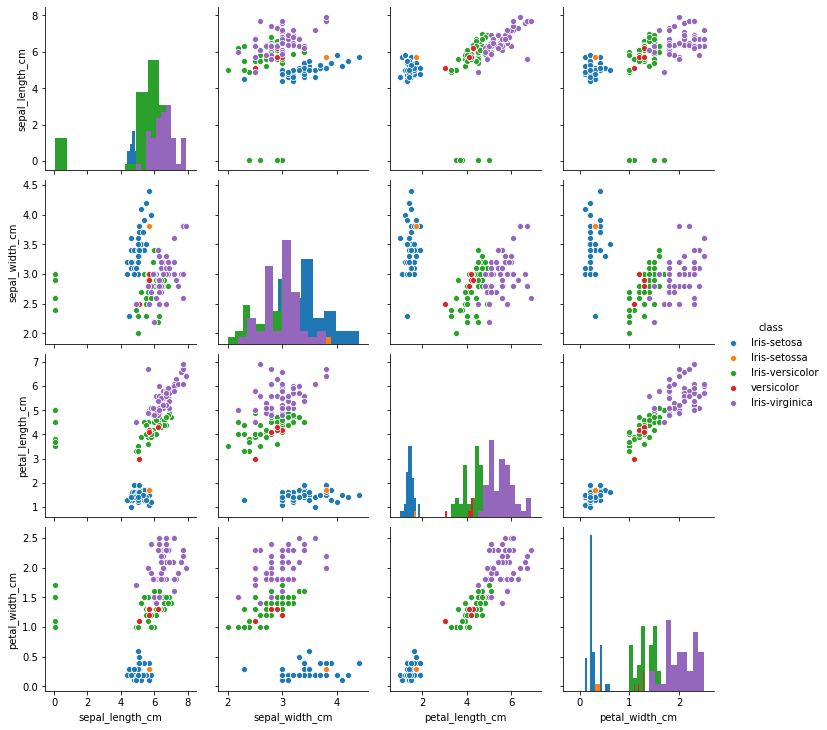

In [6]:
# hue of data according to the 'class' column
sb.pairplot(df.dropna(), hue='class',  diag_kind='hist');

In [7]:
df.loc[df['class'] == 'versicolor', 'class'] = 'Iris-versicolor';
df.loc[df['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa';
print(df['class'].unique());

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


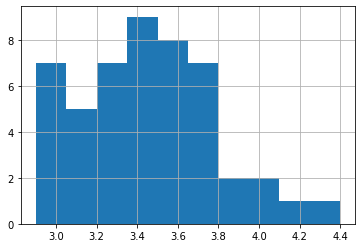

In [8]:
df = df.loc[(df['class'] != 'Iris-setosa') | (df['sepal_width_cm'] >= 2.5)];
df.loc[df['class'] == 'Iris-setosa', 'sepal_width_cm'].hist();

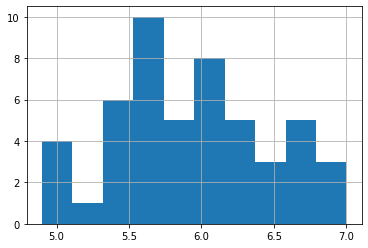

In [9]:
df.loc[(df['class'] == 'Iris-versicolor') & (df['sepal_length_cm'] < 1.0), 'sepal_length_cm'] *= 100.0;
df.loc[df['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist();

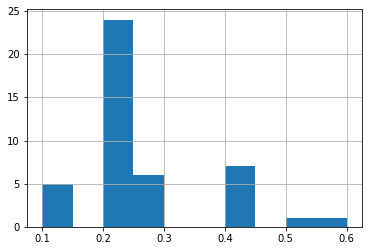

In [10]:
df.loc[df['class'] == 'Iris-setosa', 'petal_width_cm'].hist();

In [11]:
average_petal_width = df.loc[df['class'] == 'Iris-setosa', 'petal_width_cm'].mean();
df.loc[(df['class'] == 'Iris-setosa') & (df['petal_width_cm'].isnull()), 'petal_width_cm'] = average_petal_width;
print(df.loc[(df['class'] == 'Iris-setosa') & (df['petal_width_cm'] == average_petal_width)]);

    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5            0.25   
8               4.4             2.9              1.4            0.25   
9               4.9             3.1              1.5            0.25   
10              5.4             3.7              1.5            0.25   
11              4.8             3.4              1.6            0.25   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa  


In [12]:
print(df.loc[(df['sepal_length_cm'].isnull()) | (df['sepal_width_cm'].isnull()) | (df['petal_length_cm'].isnull()) | (df['petal_width_cm'].isnull())]);

Empty DataFrame
Columns: [sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, class]
Index: []


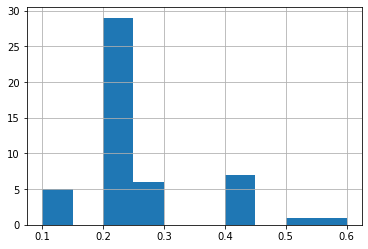

In [13]:
df.loc[df['class'] == 'Iris-setosa', 'petal_width_cm'].hist();

In [14]:
df.to_csv('./models/iris-data-clean.csv', index=False);
dfc = pd.read_csv('./models/iris-data-clean.csv');

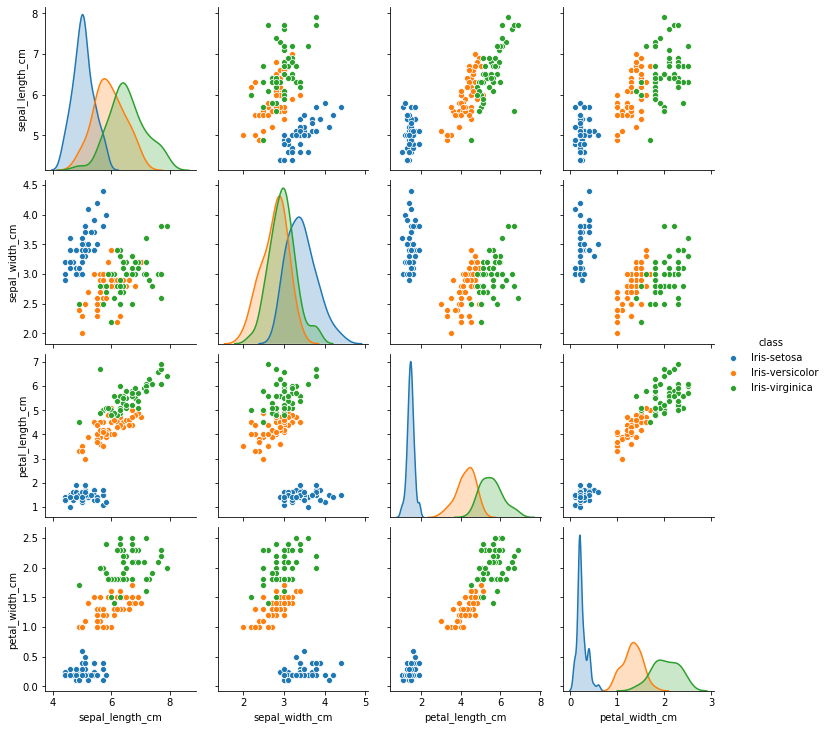

In [15]:
sb.pairplot(dfc, hue='class');

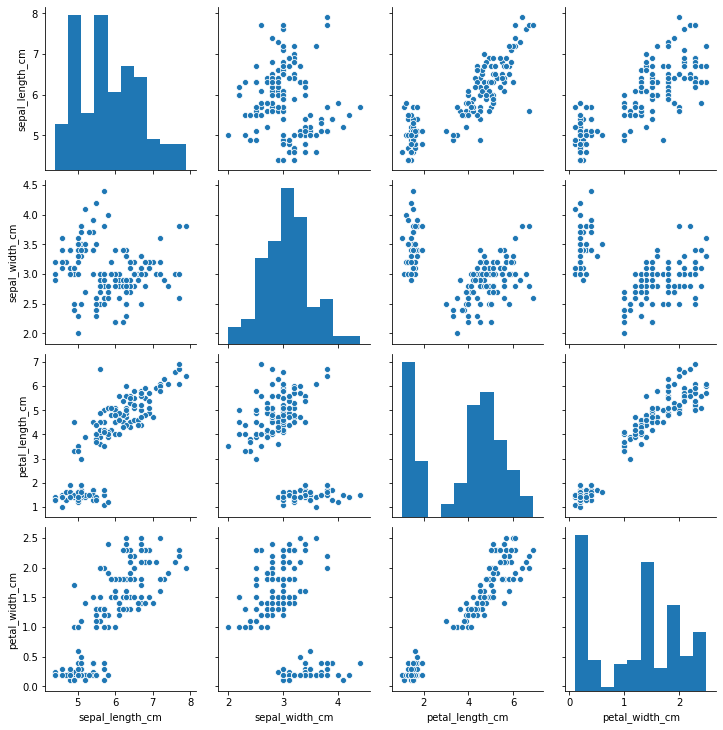

In [16]:
sb.pairplot(dfc);

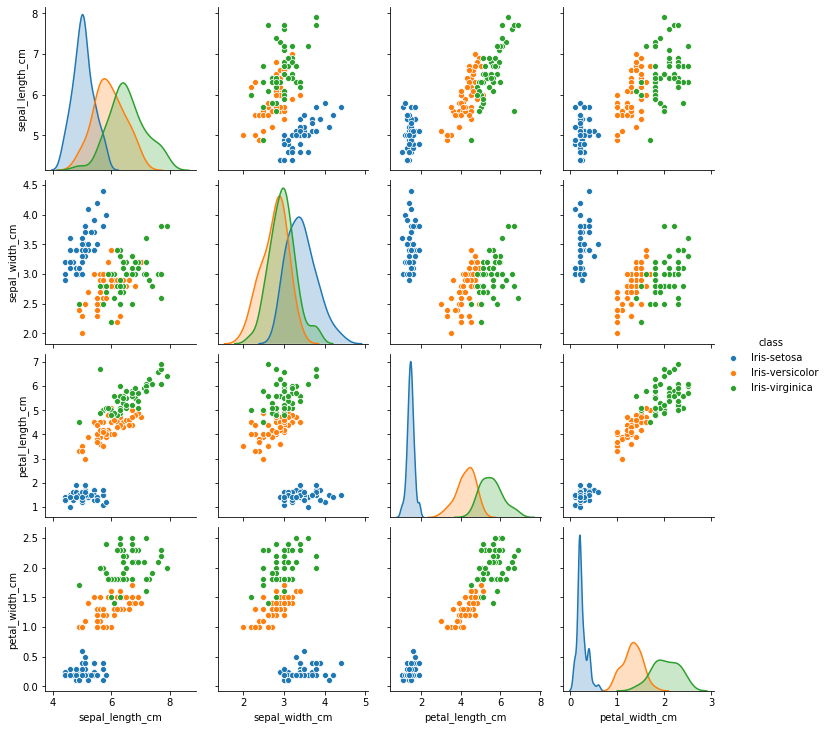

In [17]:
sb.pairplot(dfc, hue='class');

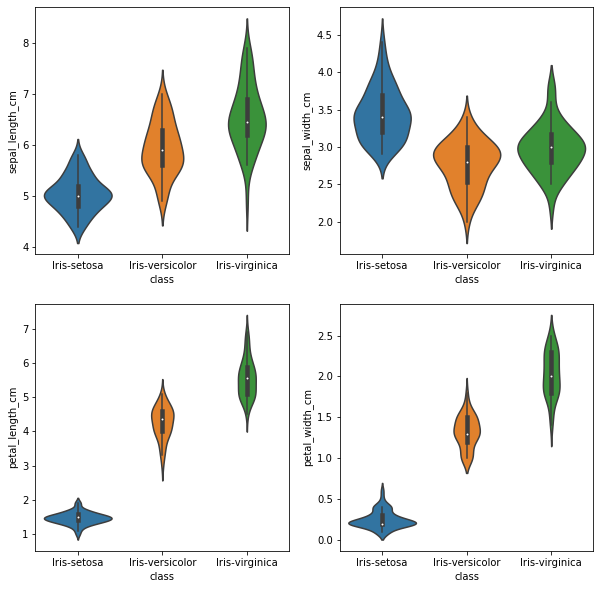

In [18]:
plt.figure(figsize=(10, 10));

for column_index, column in enumerate(dfc.columns):
    if column == 'class':
        continue;
    plt.subplot(2, 2, column_index + 1);
    sb.violinplot(x='class', y=column, data=dfc);

In [19]:
dfc = pd.read_csv('./models/iris-data-clean.csv');

In [21]:
all_inputs = dfc[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values;

all_labels = dfc['class'].values;

print(all_inputs[:5]);

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [22]:
from sklearn.model_selection import train_test_split;

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1);

In [24]:
from sklearn.tree import DecisionTreeClassifier;

decision_tree_classifier = DecisionTreeClassifier();

decision_tree_classifier.fit(training_inputs, training_classes);

print(decision_tree_classifier.score(testing_inputs, testing_classes));

0.9736842105263158


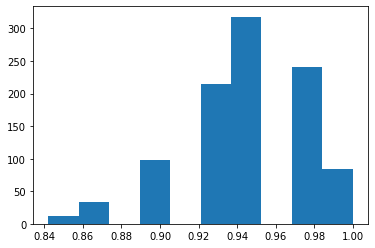

In [25]:
model_accuracies = [];

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies);